### NLP with Flair
#### Text Classification with Flair
+ Task: Predict whether a text is offensive or not

#### Installation
+ pip install flair

#### Steps
+ Prepare Dataset
  - csv or fasttext format
    - `__label__<class> <text>`
+ Split Dataset into 3
+ Create Corpus and Label Dictionary
  - CSVClassificationCorpus (csv)
  - ClassificationCorpus (fasttext format,.txt)

+ Word Embeddings
+ Train Model
+ Prediction

In [1]:
!pip install flair

     |████████████████████████████████| 337kB 9.2MB/s 
     |████████████████████████████████| 1.1MB 19.3MB/s 
     |████████████████████████████████| 1.1MB 47.3MB/s 
     |████████████████████████████████| 276kB 47.4MB/s 
     |████████████████████████████████| 19.7MB 5.3MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 798kB 45.0MB/s 
     |████████████████████████████████| 983kB 43.3MB/s 
     |████████████████████████████████| 890kB 46.7MB/s 
     |████████████████████████████████| 3.0MB 43.3MB/s 
  Created wheel for sqlitedict: filename=sqlitedict-1.7.0-cp36-none-any.whl size=14377 sha256=cf7a67d5869b3373880014af699b2286394d8ec5f9dc109bae117201f8cd2a02
  Stored in directory: /root/.cache/pip/wheels/cf/c6/4f/2c64a43f041415eb8b8740bd80e15e92f0d46c5e464d8e4b9b
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45612 sha256=d9c02c80759518a4e4963ee18e901921dbd894365bf91581a794a71df9e487a7
  Stored in directory: /root/.ca

In [2]:
# Load NLP Pkg
import flair

In [3]:
# Methods/Attrib
dir(flair)

['AnnealOnPlateau',
 'Path',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'cache_root',
 'data',
 'datasets',
 'device',
 'embedding_storage_mode',
 'embeddings',
 'file_utils',
 'logger',
 'logging',
 'models',
 'nn',
 'optim',
 'os',
 'tokenization',
 'torch',
 'trainers',
 'training_utils',
 'visual']

In [4]:
# Load EDA Pkgs
import pandas as pd 
import numpy as np

In [5]:
df = pd.read_csv("offensive_vs_non_offensive_mini_dataset.csv")

In [6]:
df.head()

,Unnamed: 0,clean_tweet,class,labels
0,0,look at what you just said lls new era girl ...,1,offensive
1,1,driving the fucktardmobile tranny slips and a...,1,offensive
2,2,if i ever put ma trust ina bitch i will alwa...,1,offensive
3,3,stop twatching me bitch,1,offensive
4,4,you know bitches be mad when they be lik...,1,offensive


In [7]:
# Check for value count
df['class'].value_counts()

1    3850
0     821
Name: class, dtype: int64

In [8]:
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


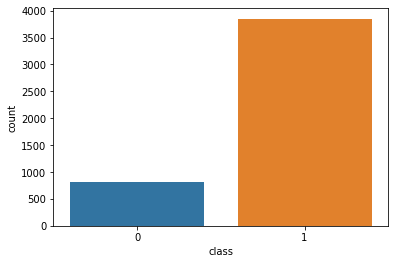

In [9]:
sns.countplot(df['class'])

In [10]:
# Preparing Dataset
# Using CSV
df.head()

,Unnamed: 0,clean_tweet,class,labels
0,0,look at what you just said lls new era girl ...,1,offensive
1,1,driving the fucktardmobile tranny slips and a...,1,offensive
2,2,if i ever put ma trust ina bitch i will alwa...,1,offensive
3,3,stop twatching me bitch,1,offensive
4,4,you know bitches be mad when they be lik...,1,offensive


In [11]:
df.columns

Index(['Unnamed: 0', 'clean_tweet', 'class', 'labels'], dtype='object')

In [12]:
df1 = df[['clean_tweet','labels']]

In [14]:
# Rename Columns
df1.columns  = ['text','labels']

In [15]:
df1

,text,labels
0,look at what you just said lls new era girl ...,offensive
1,driving the fucktardmobile tranny slips and a...,offensive
2,if i ever put ma trust ina bitch i will alwa...,offensive
3,stop twatching me bitch,offensive
4,you know bitches be mad when they be lik...,offensive
...,...,...
4666,this bitch gonna steal a police uniform and th...,offensive
4667,if california chrome does not go off at even m...,offensive
4668,i do not love you hoes,offensive
4669,lmaoooo white people lmaoo filth ...,offensive


In [16]:
# Prepare for FastText Format
#__label__ <class> <text>
df1.head()

,text,labels
0,look at what you just said lls new era girl ...,offensive
1,driving the fucktardmobile tranny slips and a...,offensive
2,if i ever put ma trust ina bitch i will alwa...,offensive
3,stop twatching me bitch,offensive
4,you know bitches be mad when they be lik...,offensive


In [17]:
# For FastText
df_fst = df1.copy()

In [18]:
df_fst.head()

,text,labels
0,look at what you just said lls new era girl ...,offensive
1,driving the fucktardmobile tranny slips and a...,offensive
2,if i ever put ma trust ina bitch i will alwa...,offensive
3,stop twatching me bitch,offensive
4,you know bitches be mad when they be lik...,offensive


In [19]:
'__label__' + df_fst['labels'].astype(str)

0       __label__offensive
1       __label__offensive
2       __label__offensive
3       __label__offensive
4       __label__offensive
               ...        
4666    __label__offensive
4667    __label__offensive
4668    __label__offensive
4669    __label__offensive
4670    __label__offensive
Name: labels, Length: 4671, dtype: object

In [20]:
df_fst['labels'] = '__label__' + df_fst['labels'].astype(str)

In [22]:
df_fst = df_fst[['labels','text']]

In [ ]:
### Spliting Dataset into 3
### train,test,dev.csv
#### 60,20,20

In [24]:
# Using Numpy
train,test,dev = np.split(df1,[int(.6*len(df1)),int(.8*len(df1))])

In [26]:
print(df1.shape)
print(train.shape)
print(test.shape)
print(dev.shape)

(4671, 2)
(2802, 2)
(934, 2)
(935, 2)


In [27]:
# Create A Folder for the csv
!mkdir -p data

In [28]:
train.to_csv("data/train.csv")
test.to_csv("data/test.csv")
dev.to_csv("data/dev.csv")

In [29]:
!ls data

dev.csv  test.csv  train.csv


In [30]:
df_fst

,labels,text
0,__label__offensive,look at what you just said lls new era girl ...
1,__label__offensive,driving the fucktardmobile tranny slips and a...
2,__label__offensive,if i ever put ma trust ina bitch i will alwa...
3,__label__offensive,stop twatching me bitch
4,__label__offensive,you know bitches be mad when they be lik...
...,...,...
4666,__label__offensive,this bitch gonna steal a police uniform and th...
4667,__label__offensive,if california chrome does not go off at even m...
4668,__label__offensive,i do not love you hoes
4669,__label__offensive,lmaoooo white people lmaoo filth ...


In [31]:
# Spliting FastText Format Dataset into 3
# Using Numpy
train_fst,test_fst,dev_fst = np.split(df_fst,[int(.6*len(df_fst)),int(.8*len(df_fst))])

In [32]:
# Store in a  folder
!mkdir -p data_fst

In [33]:
train_fst.to_csv("data_fst/train.csv",sep='\t',index=False,header=False)
test_fst.to_csv("data_fst/test.csv",sep='\t',index=False,header=False)
dev_fst.to_csv("data_fst/dev.csv",sep='\t',index=False,header=False)

In [34]:
!ls data_fst

dev.csv  test.csv  train.csv


In [ ]:
### Building our Corpus
# CSVClassificationCorpus
# ClassificationCorpus

In [35]:
from flair.datasets import ClassificationCorpus,CSVClassificationCorpus
from flair.data import Corpus

In [36]:
# For CSV
df1.columns

Index(['text', 'labels'], dtype='object')

In [55]:
# Create Column Mapping to show which column is for label and text
column_name_map = {2:"label_topic",1:"text"}


In [39]:
# Location for CSV
data_folder = 'data/'

In [56]:
# Create Corpus For CSV
corpus_csv: Corpus = CSVClassificationCorpus(data_folder,column_name_map=column_name_map,skip_header=True,delimiter=',')

2020-10-04 13:59:26,410 Reading data from data
2020-10-04 13:59:26,414 Train: data/train.csv
2020-10-04 13:59:26,416 Dev: data/dev.csv
2020-10-04 13:59:26,417 Test: data/test.csv


In [41]:
# Method 2 Using FastText Format
data_folder_fst = 'data_fst/'

In [42]:
corpus_fst: Corpus = ClassificationCorpus(data_folder_fst)

2020-10-04 13:32:54,135 Reading data from data_fst
2020-10-04 13:32:54,137 Train: data_fst/train.csv
2020-10-04 13:32:54,138 Dev: data_fst/dev.csv
2020-10-04 13:32:54,139 Test: data_fst/test.csv


In [57]:
# Creating the Label Diction For CSV
label_dict_csv = corpus_csv.make_label_dictionary()

2020-10-04 13:59:43,582 Computing label dictionary. Progress:


100%|██████████| 3736/3736 [00:02<00:00, 1383.38it/s]

2020-10-04 13:59:46,550 [b'offensive', b'non_offensive']


In [44]:
# Creating the Label Diction For FastText
label_dict_fst = corpus_fst.make_label_dictionary()

2020-10-04 13:34:57,415 Computing label dictionary. Progress:


100%|██████████| 3733/3733 [00:02<00:00, 1827.83it/s]

2020-10-04 13:34:59,588 [b'offensive', b'non_offensive']


In [45]:
# Working with the Word Embeddings
from flair.embeddings import FlairEmbeddings,WordEmbeddings,StackedEmbeddings,DocumentLSTMEmbeddings,DocumentRNNEmbeddings


In [46]:
# Create our WEmbeddings
word_embeddings = [FlairEmbeddings('news-forward-fast'),FlairEmbeddings('news-backward-fast')]

2020-10-04 13:40:09,332 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-news-english-forward-1024-v0.2rc.pt not found in cache, downloading to /tmp/tmpoq0qzh98


100%|██████████| 19689779/19689779 [00:00<00:00, 37035937.62B/s]

2020-10-04 13:40:09,930 copying /tmp/tmpoq0qzh98 to cache at /root/.flair/embeddings/lm-news-english-forward-1024-v0.2rc.pt
2020-10-04 13:40:09,977 removing temp file /tmp/tmpoq0qzh98


2020-10-04 13:40:10,619 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-news-english-backward-1024-v0.2rc.pt not found in cache, downloading to /tmp/tmpr4dnpuah


100%|██████████| 19689779/19689779 [00:00<00:00, 36642750.83B/s]

2020-10-04 13:40:11,225 copying /tmp/tmpr4dnpuah to cache at /root/.flair/embeddings/lm-news-english-backward-1024-v0.2rc.pt
2020-10-04 13:40:11,255 removing temp file /tmp/tmpr4dnpuah


In [62]:
# Document Embeddings
document_embeddings = DocumentLSTMEmbeddings(word_embeddings,hidden_size=512,reproject_words=True,reproject_words_dimension=256)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated method __init__. (The functionality of this class is moved to 'DocumentRNNEmbeddings') -- Deprecated since version 0.4.
  


#### Building and Training

In [63]:
# Load NLP Pkgs
from flair.models import TextClassifier
from flair.trainers import ModelTrainer

In [64]:
# Classifier with CSV dataset
clf = TextClassifier(document_embeddings,label_dictionary=label_dict_csv)

In [68]:
# Classifier with FastText Format
clf2 = TextClassifier(document_embeddings,label_dictionary=label_dict_fst)

In [69]:
# Training
# Init
trainer = ModelTrainer(clf2,corpus_fst)

In [70]:
# Fit/Training with Dataset
trainer.train('data_fst/',max_epochs=2)

2020-10-04 14:07:16,724 ----------------------------------------------------------------------------------------------------
2020-10-04 14:07:16,727 Model: "TextClassifier(
  (document_embeddings): DocumentLSTMEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=2048, out_features=256, bias=True)
    (rnn): GRU(256, 512)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  

{'dev_loss_history': [0.4188002943992615, 0.4321114122867584],
 'dev_score_history': [0.8182, 0.8214],
 'test_score': 0.8541,
 'train_loss_history': [0.4551706066863103, 0.4124030032279817]}

In [71]:
# Making Prediciton
# Load Saved Model and Predict
new_clf = TextClassifier.load('data_fst/best-model.pt')

2020-10-04 14:19:05,861 loading file data_fst/best-model.pt


In [72]:
from flair.data import Sentence

In [73]:
# Sample Sentence
ex1 = Sentence("That girl is a bitch")
ex2 = Sentence("This is a good material")

In [74]:
# Apply our model
new_clf.predict(ex1)

In [75]:
ex1.labels

[offensive (0.7436)]

In [76]:
new_clf.predict(ex2)

In [77]:
ex2.labels

[non_offensive (0.7178)]

In [78]:
# Plot Loss Curve
from flair.visual.training_curves import Plotter

2020-10-04 14:23:07,751 ----------------------------------------------------------------------------------------------------
2020-10-04 14:23:07,753 WARNING: No LOSS found for test split in this data.
2020-10-04 14:23:07,754 Are you sure you want to plot LOSS and not another value?
2020-10-04 14:23:07,755 ----------------------------------------------------------------------------------------------------
2020-10-04 14:23:07,791 ----------------------------------------------------------------------------------------------------
2020-10-04 14:23:07,792 WARNING: No F1 found for test split in this data.
2020-10-04 14:23:07,793 Are you sure you want to plot F1 and not another value?
2020-10-04 14:23:07,794 ----------------------------------------------------------------------------------------------------


No handles with labels found to put in legend.


Loss and F1 plots are saved in data_fst/training.png


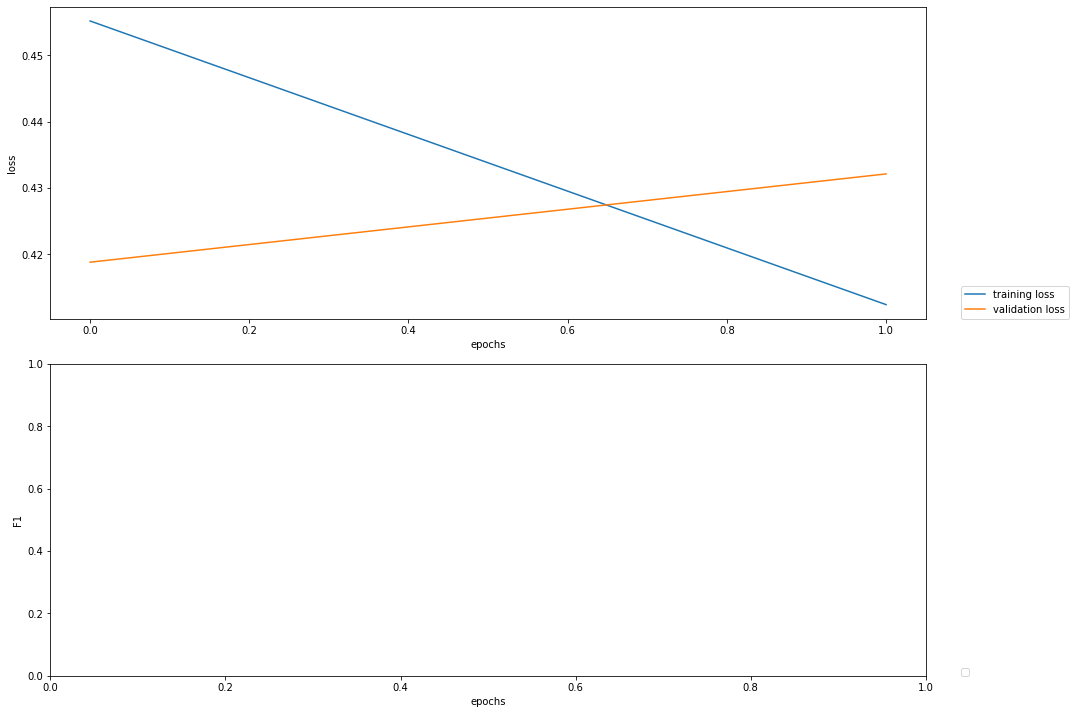

Weights plots are saved in data_fst/weights.png


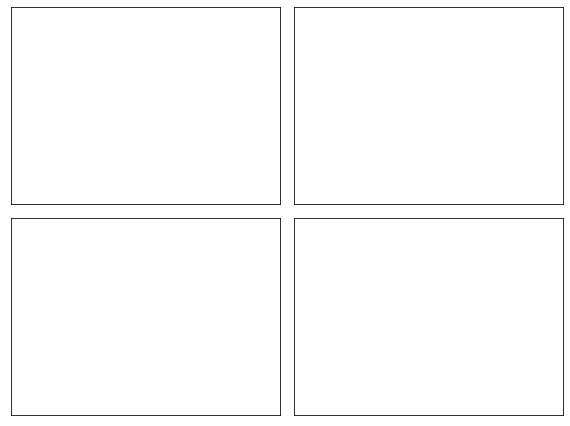

In [79]:
plotter = Plotter()
plotter.plot_training_curves('data_fst/loss.tsv')
plotter.plot_weights('data_fst/weights.txt')

In [80]:
### Thanks For Watching
### Jesus Saves @JCharisTech
### Jesse E.Agbe(JCharis)
### Awesome NLP Course